##### Problem statement

you have been provided with a dataset containing key demographic and finanacial details of 
bank customers.
Your goal is to:
* analyze the dataset to gain insights into customer behaviour, financial standing, 
  and engagement patterns.
* uncover valuable insights for the bank's decision making process
* identify trends and patterns in customer engagement
* highlighting potential areas for business improvement

*Objectives*
* Get sales data
* Examine and profile
* Prepare for visualization
* Draw conclusions and recommendations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
account_df = pd.read_csv('project_datasource/Bank_Churn_Messy.xlsx - Account_Info.csv')
customers_df = pd.read_csv('project_datasource/Bank_Churn_Messy.xlsx - Customer_Info.csv')

##### *Data Profiling*

In [3]:
account_df.head(10)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
5,15737888,€125510.82,1,Yes,2,Yes,0
6,15574012,€113755.78,2,No,8,No,1
7,15592531,€0.0,2,Yes,7,Yes,0
8,15656148,€115046.74,4,No,4,No,1
9,15792365,€142051.07,2,Yes,4,Yes,0


In [4]:
customers_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
5,15574012,Chu,645,Spain,Male,44.0,8,€149756.71
6,15592531,Bartlett,822,France,Male,50.0,7,€10062.8
7,15656148,Obinna,376,Germany,Female,29.0,4,€119346.88
8,15792365,He,501,French,Male,44.0,4,€74940.5
9,15592389,H?,684,France,Male,27.0,2,€71725.73


In [5]:
customers_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [6]:
account_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')

*Combining Data*

In [7]:
comb_df = pd.merge(account_df, customers_df,  how = 'right', left_on = 'CustomerId', right_on = 'CustomerId')
comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [8]:
comb_df.shape

(10004, 14)

In [9]:
account_df.shape

(10002, 7)

In [10]:
customers_df.shape

(10001, 8)

In [11]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Balance          10004 non-null  object 
 2   NumOfProducts    10004 non-null  int64  
 3   HasCrCard        10004 non-null  object 
 4   Tenure_x         10004 non-null  int64  
 5   IsActiveMember   10004 non-null  object 
 6   Exited           10004 non-null  int64  
 7   Surname          10001 non-null  object 
 8   CreditScore      10004 non-null  int64  
 9   Geography        10004 non-null  object 
 10  Gender           10004 non-null  object 
 11  Age              10001 non-null  float64
 12  Tenure_y         10004 non-null  int64  
 13  EstimatedSalary  10004 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [12]:
comb_df.rename(columns = {
    'IsActiveMember' : 'Active Member',
    'HasCrCard' : 'Credit Card Holder'
}, inplace=True)

In [13]:
comb_df.describe()

,CustomerId,NumOfProducts,Tenure_x,Exited,CreditScore,Age,Tenure_y
count,1.000400e+04,10004.000000,10004.000000,10004.000000,10004.000000,10001.000000,10004.000000
mean,1.569092e+07,1.529988,5.012195,0.203719,650.568073,38.919108,5.012195
std,7.193218e+04,0.581635,2.891806,0.402782,96.665531,10.488725,2.891806
min,1.556570e+07,1.000000,0.000000,0.000000,350.000000,18.000000,0.000000
25%,1.562839e+07,1.000000,3.000000,0.000000,584.000000,32.000000,3.000000
50%,1.569071e+07,1.000000,5.000000,0.000000,652.000000,37.000000,5.000000
75%,1.575322e+07,2.000000,7.000000,0.000000,718.000000,44.000000,7.000000
max,1.581569e+07,4.000000,10.000000,1.000000,850.000000,92.000000,10.000000


##### Inference from descriptive analysis
* Max number of products used by customers is 4 and minimum number is 1 while on the average, customers use at least one or two of the bank's products
* The oldest staying customers have stayed for about 10 years while the shortest have been zero years,showing lack of follow through on new customwers.
* Customers age ranges from 18years to 92years. 

In [14]:
cat_col = [col for col in comb_df.select_dtypes(['object']).columns]
cat_col

['Balance',
 'Credit Card Holder',
 'Active Member',
 'Surname',
 'Geography',
 'Gender',
 'EstimatedSalary']

In [15]:
num_col = [col for col in comb_df.select_dtypes(['int64','float64']).columns]
num_col

['CustomerId',
 'NumOfProducts',
 'Tenure_x',
 'Exited',
 'CreditScore',
 'Age',
 'Tenure_y']

In [16]:
for col in cat_col:
    print(comb_df[col].value_counts())
    print('-----------------')

Balance
€0.0          3618
€130142.79       4
€105473.74       2
€130170.82       2
€159660.8        1
              ... 
€136596.85       1
€81556.89        1
€112687.69       1
€108698.96       1
€148795.17       1
Name: count, Length: 6382, dtype: int64
-----------------
Credit Card Holder
Yes    5152
No     4852
Name: count, dtype: int64
-----------------
Active Member
Yes    5152
No     4852
Name: count, dtype: int64
-----------------
Surname
Smith       32
Walker      31
Martin      29
Scott       29
Brown       26
            ..
Howey        1
Basedow      1
Thomsen      1
Riddle       1
Burbidge     1
Name: count, Length: 2932, dtype: int64
-----------------
Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64
-----------------
Gender
Male      5457
Female    4547
Name: count, dtype: int64
-----------------
EstimatedSalary
€38190.78     4
-€999999      3
€24924.92     2
€101348.88    2
€79084.1      1
             .

In [17]:
comb_df.duplicated().sum()

4

In [18]:
comb_df.drop_duplicates(inplace=True)

In [19]:
comb_df.duplicated().sum()

0

In [20]:
comb_df.shape

(10000, 14)

In [21]:
comb_df.isnull().sum()

CustomerId            0
Balance               0
NumOfProducts         0
Credit Card Holder    0
Tenure_x              0
Active Member         0
Exited                0
Surname               3
CreditScore           0
Geography             0
Gender                0
Age                   3
Tenure_y              0
EstimatedSalary       0
dtype: int64

In [22]:
comb_df.isnull().sum() / len(comb_df) * 100

CustomerId            0.00
Balance               0.00
NumOfProducts         0.00
Credit Card Holder    0.00
Tenure_x              0.00
Active Member         0.00
Exited                0.00
Surname               0.03
CreditScore           0.00
Geography             0.00
Gender                0.00
Age                   0.03
Tenure_y              0.00
EstimatedSalary       0.00
dtype: float64

In [23]:
comb_df[comb_df['Surname'].isnull()]

,CustomerId,Balance,NumOfProducts,Credit Card Holder,Tenure_x,Active Member,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
29,15728693,€141349.43,1,Yes,3,Yes,0,NaN,574,Germany,Female,NaN,3,-€999999
122,15580203,€120193.42,1,No,6,No,0,NaN,674,Spain,Male,NaN,6,-€999999
9390,15756954,€0.0,1,Yes,2,Yes,0,NaN,538,France,Female,NaN,2,-€999999


In [24]:
comb_df['Surname'] = comb_df['Surname'].fillna('Unknown')
comb_df['Surname']


0         Hargrave
2             Hill
3             Onio
4             Boni
5         Mitchell
           ...    
9996      Obijiaku
9997     Johnstone
9998           Liu
9999     Sabbatini
10000       Walker
Name: Surname, Length: 10000, dtype: object

In [24]:
mean_Age = comb_df['Age'].mean()
comb_df['Age'] = comb_df['Age'].fillna(mean_Age)

In [25]:
comb_df['Age']

0        42.0
2        41.0
3        42.0
4        39.0
5        43.0
         ... 
9996     39.0
9997     35.0
9998     36.0
9999     42.0
10000    28.0
Name: Age, Length: 10000, dtype: float64

In [26]:
comb_df.replace('FRA','France')

,CustomerId,Balance,NumOfProducts,Credit Card Holder,Tenure_x,Active Member,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,France,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,France,Female,39.0,1,€93826.63
5,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,€0.0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,5,€96270.64
9997,15569892,€57369.61,1,Yes,10,Yes,0,Johnstone,516,French,Male,35.0,10,€101699.77
9998,15584532,€0.0,1,Yes,7,Yes,1,Liu,709,France,Female,36.0,7,€42085.58
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52


In [27]:
comb_df.replace('French','France')

,CustomerId,Balance,NumOfProducts,Credit Card Holder,Tenure_x,Active Member,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,France,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
5,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,€0.0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,5,€96270.64
9997,15569892,€57369.61,1,Yes,10,Yes,0,Johnstone,516,France,Male,35.0,10,€101699.77
9998,15584532,€0.0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,7,€42085.58
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52


In [54]:
comb_df["Balance"] = comb_df["Balance"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)
comb_df["EstimatedSalary"] = comb_df["EstimatedSalary"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)

In [58]:
# Convert to numeric
comb_df["Balance"] = pd.to_numeric(comb_df["Balance"], errors="coerce")
comb_df["EstimatedSalary"] = pd.to_numeric(comb_df["EstimatedSalary"], errors="coerce")
comb_df = comb_df.dropna(subset=["Credit_Score_Bracket"])
agg = comb_df.groupby("Credit_Score_Bracket", observed=True) [["Balance", "EstimatedSalary"]].count().reset_index()
print(agg)

  Credit_Score_Bracket  Balance  EstimatedSalary
0                 Poor        0                0
1                 Fair        0                0
2                 Good        0                0
3            Very Good        0                0
4            Excellent        0                0


In [ ]:
# Step 2: Convert to numeric (turn bad values into NaN if they can't be parsed)
comb_df["Balance"] = pd.to_numeric(comb_df["Balance"], errors="coerce")
comb_df["EstimatedSalary"] = pd.to_numeric(comb_df["EstimatedSalary"], errors="coerce")

# Step 3: Drop rows with missing credit score brackets
comb_df = comb_df.dropna(subset=["Credit_Score_Bracket"])

# Step 4: Group and calculate means
agg = comb_df.groupby("Credit_Score_Bracket")[["Balance", "EstimatedSalary"]].mean().reset_index()

print(agg)

In [56]:
print(comb_df[["Balance", "EstimatedSalary"]].head(10))   
print(comb_df[["Balance", "EstimatedSalary"]].dtypes)     


    Balance  EstimatedSalary
0       NaN              NaN
2       NaN              NaN
3       NaN              NaN
4       NaN              NaN
5       NaN              NaN
6       NaN              NaN
7       NaN              NaN
8       NaN              NaN
9       NaN              NaN
10      NaN              NaN
Balance            float64
EstimatedSalary    float64
dtype: object


In [28]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Balance             10000 non-null  object 
 2   NumOfProducts       10000 non-null  int64  
 3   Credit Card Holder  10000 non-null  object 
 4   Tenure_x            10000 non-null  int64  
 5   Active Member       10000 non-null  object 
 6   Exited              10000 non-null  int64  
 7   Surname             9997 non-null   object 
 8   CreditScore         10000 non-null  int64  
 9   Geography           10000 non-null  object 
 10  Gender              10000 non-null  object 
 11  Age                 10000 non-null  float64
 12  Tenure_y            10000 non-null  int64  
 13  EstimatedSalary     10000 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [29]:
comb_df.to_csv('Cleaned_Bank_Analysis.csv')

#### Data Preparation

In [81]:
#### Helper funtions

plt.figure(figsize=(20, 10)).patch.set_facecolor('none')

def generate_bar_plot(x, y, xlabel, ylabel):
    plt.bar(x,y,color='blue', edgecolor='black')
    plt.title(f'plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()

def generate_line_plot(x, y, xlabel, ylabel, data):
    sb.lineplot(x,y,data=data, color='blue')
    plt.title(f'plot of how {ylabel} changes with {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()

<Figure size 2000x1000 with 0 Axes>

In [31]:
##### Categorical Groupings

# Age Bracket
age = [18,25,35,45,55,65,100]
age_range = ['18-24','25-34','35-44','45-54','55-64','65+']
comb_df['Age_Bracket'] = pd.cut(comb_df['Age'], bins=age, labels=age_range, right=False)
comb_df['Age_Bracket'] 

0        35-44
2        35-44
3        35-44
4        35-44
5        35-44
         ...  
9996     35-44
9997     35-44
9998     35-44
9999     35-44
10000    25-34
Name: Age_Bracket, Length: 10000, dtype: category
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [32]:
# Credit Score brackets

credit_score = [-1,579,669,739,799,10000]
credit_rating = ['Poor','Fair','Good','Very Good','Excellent']
comb_df['Credit_Score_Bracket'] = pd.cut(comb_df['CreditScore'], bins=credit_score, labels=credit_rating)
comb_df['Credit_Score_Bracket'] 

0             Fair
2             Fair
3             Poor
4             Good
5        Excellent
           ...    
9996     Very Good
9997          Poor
9998          Good
9999     Very Good
10000    Very Good
Name: Credit_Score_Bracket, Length: 10000, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Excellent']

In [33]:
# Tenure Bracket

tenure_x = [-1,1,3,6,10,100]
tenure_y = [-1,1,3,6,10,100]
tenure_range = ['0-1','2-3','4-6','7-10','10+']
comb_df['Tenure_Bracket'] = pd.cut(comb_df['Tenure_x'], bins=tenure_x, labels=tenure_range)
comb_df['Tenure_Bracket']

0         2-3
2         0-1
3        7-10
4         0-1
5         2-3
         ... 
9996      4-6
9997     7-10
9998     7-10
9999      2-3
10000     4-6
Name: Tenure_Bracket, Length: 10000, dtype: category
Categories (5, object): ['0-1' < '2-3' < '4-6' < '7-10' < '10+']

##### Analysis 1

Which age and gender groups dominate across key geographies?

In [34]:
top_geos= comb_df['Geography'].value_counts().nlargest(5).index.tolist()

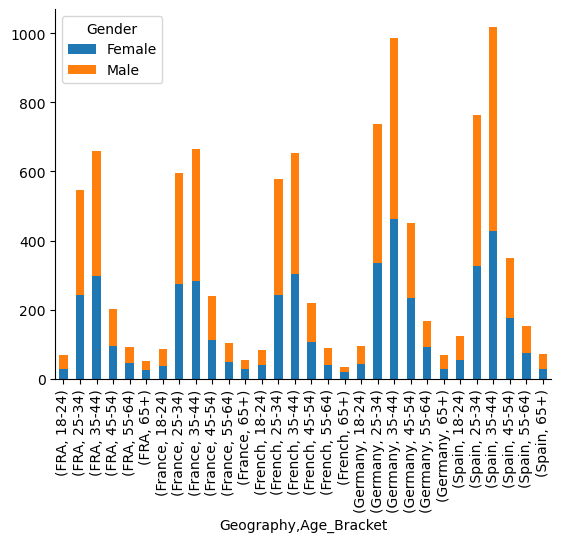

In [35]:
demography = comb_df[comb_df['Geography'].isin(top_geos)]\
        .groupby(['Geography','Age_Bracket','Gender'], observed=True).size().unstack(fill_value=1)

demography.plot(kind="bar", stacked=True)
sb.despine()


##### Insight; 
Middle age groups (25–34 and 35–44) generally have larger populations compared to younger (18–24) or older (65+) groups.

Spain and Germany have particularly high counts in the 35–44 age group.

In most countries and age groups, males (orange) are more numerous than females (blue).


## Analysis 2

What is the typical product holding and activity level by region?

In [65]:
active_geo = comb_df.groupby("Geography")['Active Member'].count()
active_geo


Geography
FRA        1618
France     1741
French     1655
Germany    2509
Spain      2477
Name: Active Member, dtype: int64

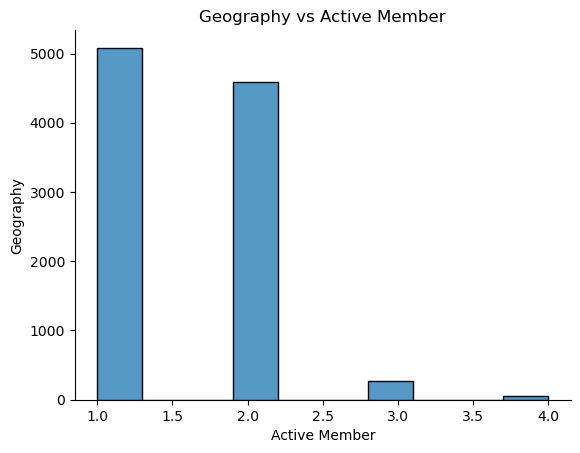

In [68]:
sb.histplot(comb_df['NumOfProducts'], bins=10)
plt.title("Geography vs Active Member")
plt.xlabel("Active Member")
plt.ylabel("Geography")
sb.despine()
plt.show()


In [ ]:
### Insight; 
* The chart shows a heavily skewed distribution where the majority fall into categories 1 and 2
* This suggests that geography-related representation is stronger among category 1.


## Analysis 3
Which customer segments are most at risk of churn?

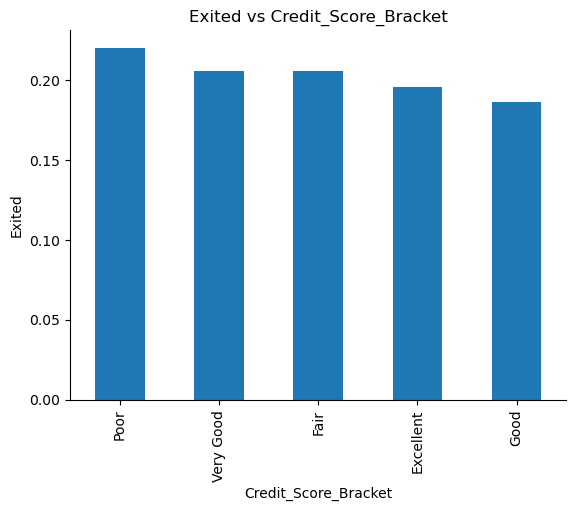

In [78]:
(
    comb_df.groupby("Credit_Score_Bracket", observed=True)["Exited"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar"))

plt.title("Exited vs Credit_Score_Bracket")
plt.xlabel("Credit_Score_Bracket")
plt.ylabel("Exited")
sb.despine()
plt.show()




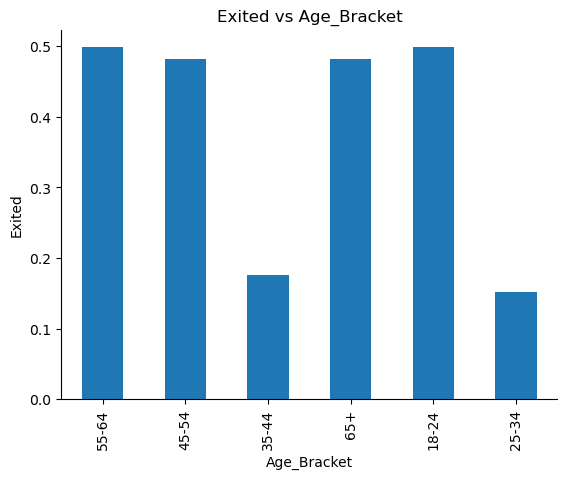

In [79]:
comb_df.groupby("Age_Bracket", observed= True)['Exited'].mean().plot(kind="bar")
(
    comb_df.groupby("Age_Bracket", observed=True)["Exited"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar"))

plt.title("Exited vs Age_Bracket")
plt.xlabel("Age_Bracket")
plt.ylabel("Exited")
sb.despine()
plt.show()

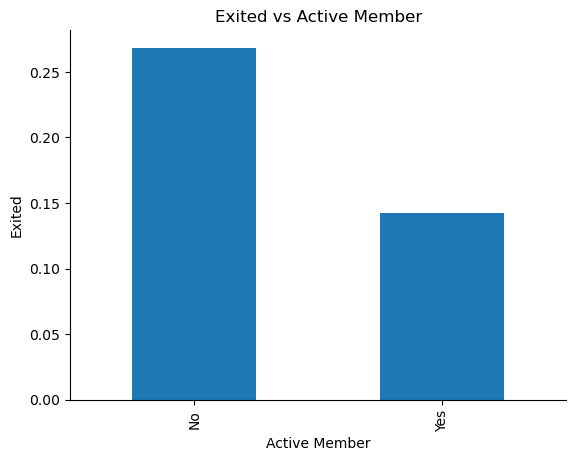

In [80]:
(
    comb_df.groupby("Active Member", observed=True)["Exited"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar"))

plt.title("Exited vs Active Member")
plt.xlabel("Active Member")
plt.ylabel("Exited")
sb.despine()
plt.show()

### Insight
* Customers with Poor credit scores have the highest exit rate (above 0.21)
* There is a slight downward trend as credit score improves
* Higher Exit Rates in Older and Youngest Groups
* Customers who are not active members have an exit rate of >25%.

# Analysis 4

How does churn risk change as customer tenure increases?

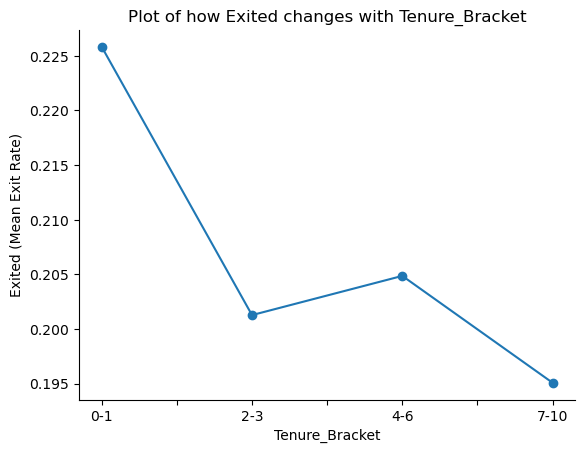

In [86]:
Bracket = comb_df.groupby("Tenure_Bracket", observed=True)['Exited'].mean()
Bracket.plot(kind="line", marker="o")
plt.title("Plot of how Exited changes with Tenure_Bracket")
plt.xlabel("Tenure_Bracket")
plt.ylabel("Exited")
sb.despine()
plt.show()


# Insight

* Highest Exit Rate in New Customers (0–1 years).
* Customers in the 2–3 year bracket show a significant drop in exit rate (to ~20.2%)

###### Analysis 5

What financial value can be protected by reducing churn in key at-risk groups?

IndexError: index 0 is out of bounds for axis 0 with size 0

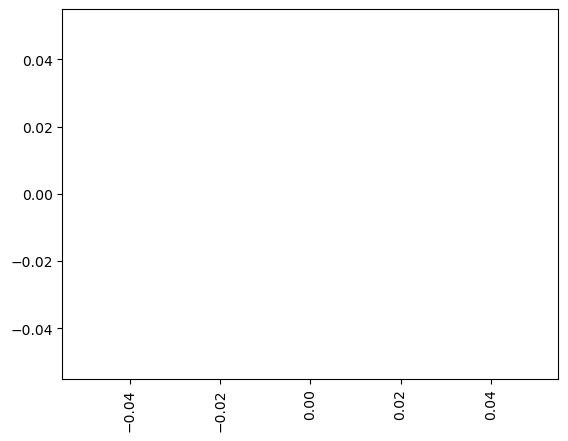

In [97]:
at_risk = comb_df[
    (comb_df['Active Member'] == 0) & (comb_df['NumOfProducts'] <= 1)
]
risk_value = at_risk.groupby("Credit_Score_Bracket", observed=True)["EstimatedSalary"].sum().sort_values(ascending=False)
risk_value.plot(kind="bar", color="blue", alpha=0.8)

plt.title("Financial Value at Risk by Credit Score Bracket")
plt.xlabel("Credit Score Bracket")
plt.ylabel("EstimatedSalary")
sb.despine()
plt.show()

In [ ]:
# 4. Optional: overall financial impact
total_value_at_risk = at_risk["Balance"].sum()
print(f"Total financial value at risk: ₦{total_value_at_risk:,.2f}")